<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/Fourier_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load the grayscale image
image = cv2.imread("/content/F40.jpg", cv2.IMREAD_GRAYSCALE)

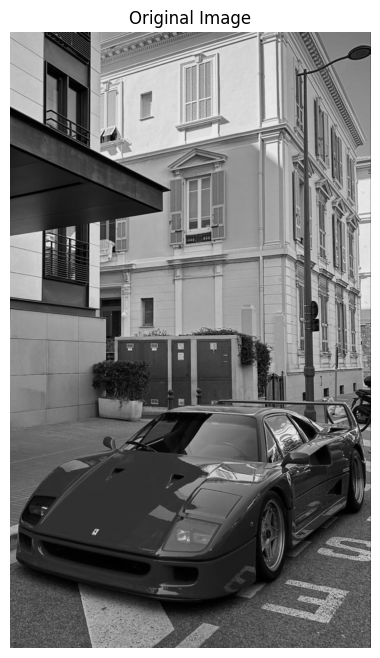

In [7]:
# Display the Original Image
plt.figure(figsize=(8, 8))
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [8]:
# 1. Compute the 2D Fourier Transform
f_transform = np.fft.fft2(image)  # Compute FFT
f_transform_shifted = np.fft.fftshift(f_transform)  # Shift to center low frequencies
# Compute magnitude spectrum for visualization
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

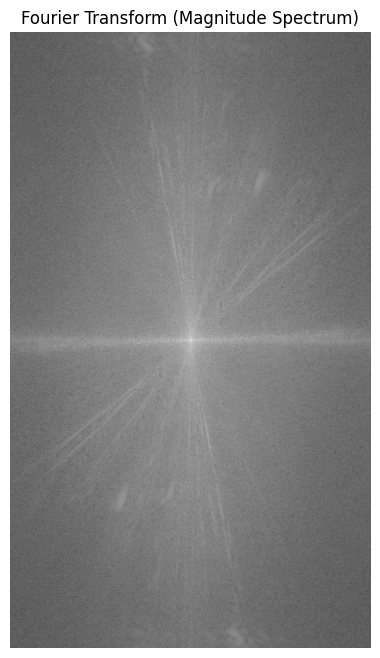

In [9]:
# Display the Magnitude Spectrum
plt.figure(figsize=(8, 8))
plt.title("Fourier Transform (Magnitude Spectrum)")
plt.imshow(magnitude_spectrum, cmap="gray")
plt.axis("off")
plt.show()

In [13]:
# 2. Create an Ideal Low-Pass Filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center
radius = 120  # Cut-off frequency
low_pass_filter = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_filter, (ccol, crow), radius, 1, thickness=-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

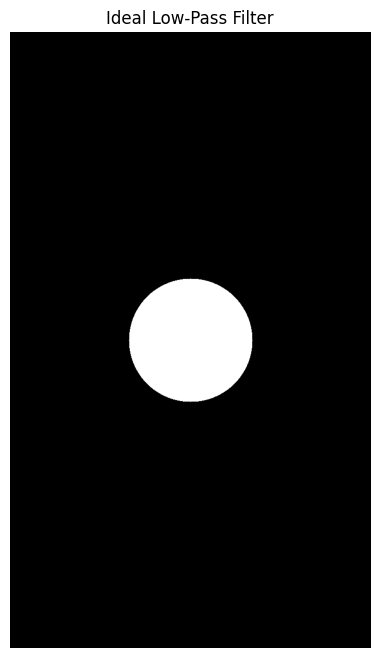

In [14]:
plt.figure(figsize=(8, 8))
plt.title("Ideal Low-Pass Filter")
plt.imshow(low_pass_filter, cmap="gray")
plt.axis("off")
plt.show()

In [15]:
# 3. Apply the Low-Pass Filter
low_pass_filtered = f_transform_shifted * low_pass_filter

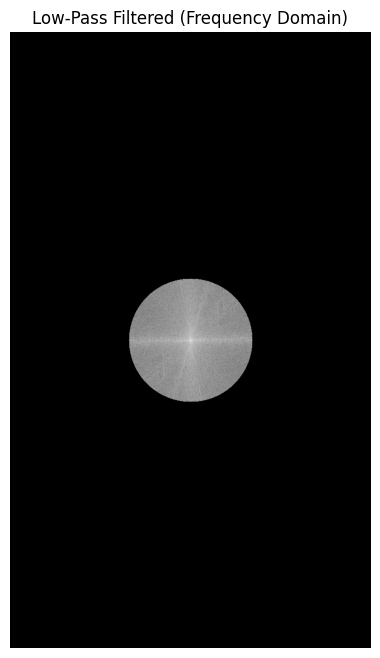

In [16]:
filtered_magnitude_spectrum = 20 * np.log(np.abs(low_pass_filtered) + 1)
plt.figure(figsize=(8, 8))
plt.title("Low-Pass Filtered (Frequency Domain)")
plt.imshow(filtered_magnitude_spectrum, cmap="gray")
plt.axis("off")
plt.show()

In [18]:
# 4. Apply Inverse Fourier Transform
f_ishift = np.fft.ifftshift(low_pass_filtered)
image_low_pass = np.abs(np.fft.ifft2(f_ishift))

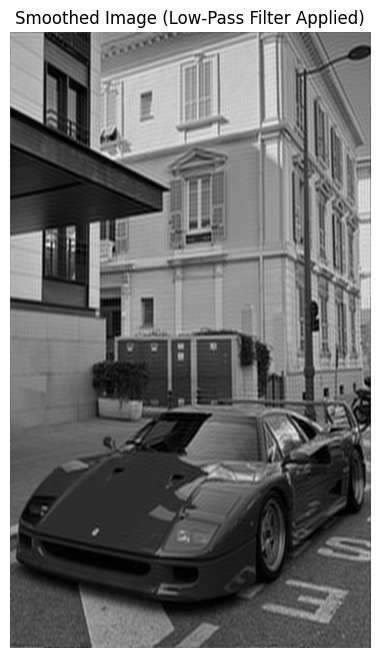

In [19]:
plt.figure(figsize=(8, 8))
plt.title("Smoothed Image (Low-Pass Filter Applied)")
plt.imshow(image_low_pass, cmap="gray")
plt.axis("off")
plt.show()

In [20]:
# 5. Create an Ideal High-Pass Filter
high_pass_filter = 1 - low_pass_filter  # Complement of the low-pass filter

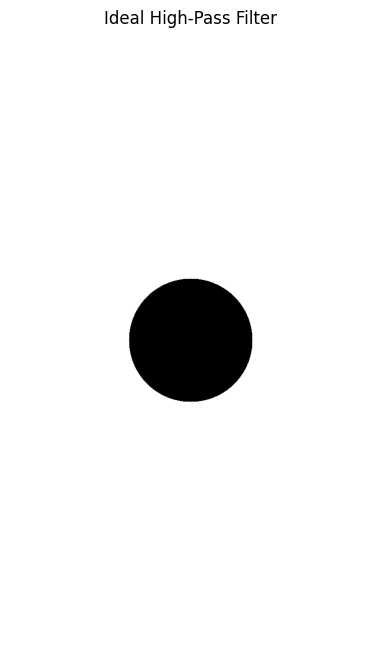

In [21]:
plt.figure(figsize=(8, 8))
plt.title("Ideal High-Pass Filter")
plt.imshow(high_pass_filter, cmap="gray")
plt.axis("off")
plt.show()

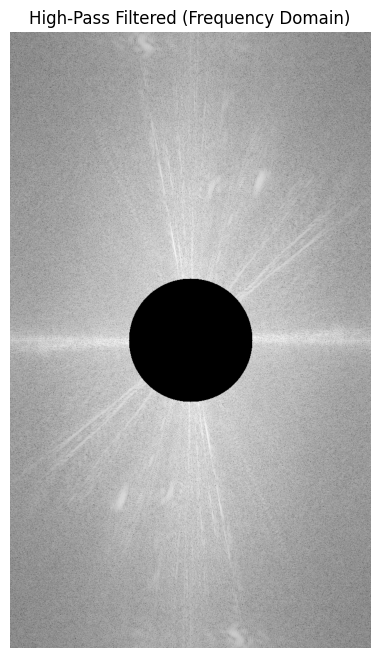

In [22]:
# 6. Apply the High-Pass Filter
high_pass_filtered = f_transform_shifted * high_pass_filter

filtered_magnitude_spectrum_hp = 20 * np.log(np.abs(high_pass_filtered) + 1)
plt.figure(figsize=(8, 8))
plt.title("High-Pass Filtered (Frequency Domain)")
plt.imshow(filtered_magnitude_spectrum_hp, cmap="gray")
plt.axis("off")
plt.show()

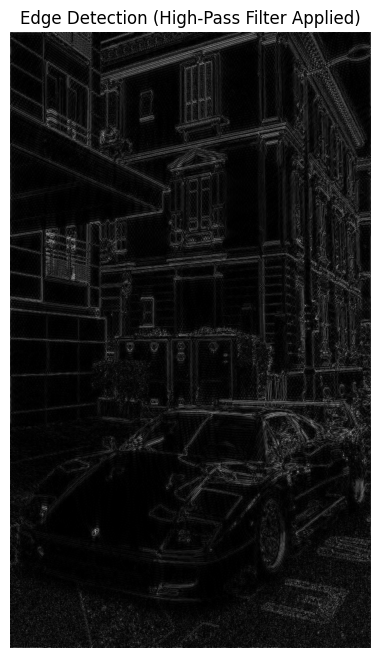

In [23]:
# 7. Apply Inverse Fourier Transform for Edge Detection
f_ishift_hp = np.fft.ifftshift(high_pass_filtered)
image_high_pass = np.abs(np.fft.ifft2(f_ishift_hp))

plt.figure(figsize=(8, 8))
plt.title("Edge Detection (High-Pass Filter Applied)")
plt.imshow(image_high_pass, cmap="gray")
plt.axis("off")
plt.show()

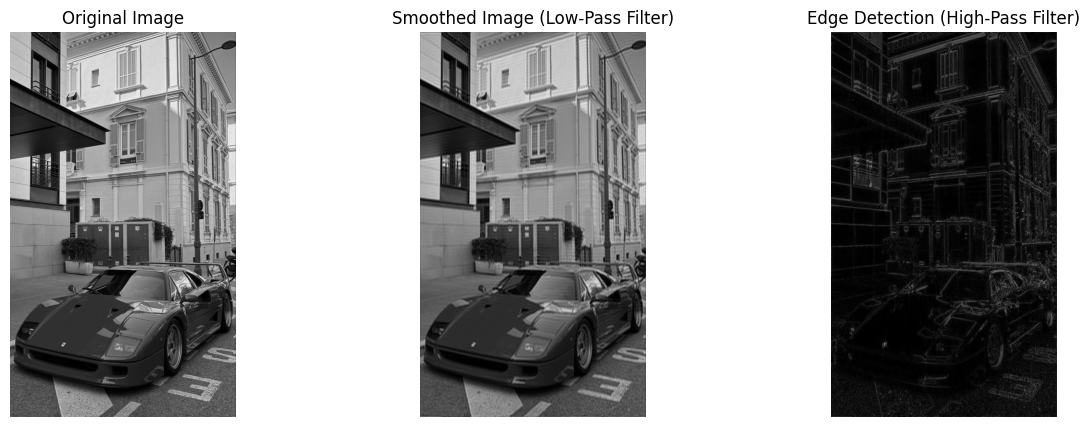

In [24]:
# Plot Final Images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(image_low_pass, cmap="gray")
ax[1].set_title("Smoothed Image (Low-Pass Filter)")
ax[1].axis("off")

ax[2].imshow(image_high_pass, cmap="gray")
ax[2].set_title("Edge Detection (High-Pass Filter)")
ax[2].axis("off")

plt.show()